**Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

**Dataset**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Wetland/T500.csv')

In [ ]:
dataset.head()

,Sl,VZ,A,R,P,So,G
0,1,1,123.693001,0.000000,0.0,1,3
1,2,1,42.426399,0.000000,0.0,1,5
2,3,1,0.000000,0.006859,0.0,1,4
3,4,1,234.307007,0.007808,0.0,1,4
4,5,1,174.929001,0.007808,0.0,1,4


In [ ]:
dataset.tail()

,Sl,VZ,A,R,P,So,G
248,249,5,450.0,0.012647,0.0,3,3
249,250,5,450.0,0.012587,0.0,3,3
250,251,5,450.0,0.001301,0.0,1,0
251,252,5,450.0,0.013888,0.0,3,3
252,253,5,450.0,0.000000,0.0,3,3


In [ ]:
dataset.columns

Index(['Sl', 'VZ', 'A', 'R', 'P', 'So', 'G'], dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sl      253 non-null    int64  
 1   VZ      253 non-null    int64  
 2   A       253 non-null    float64
 3   R       253 non-null    float64
 4   P       253 non-null    float64
 5   So      253 non-null    int64  
 6   G       253 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 14.0 KB


In [ ]:
dataset.shape

(253, 7)

In [ ]:
dataset.dropna(inplace = True)

In [ ]:
dataset.isnull().sum()

Sl    0
VZ    0
A     0
R     0
P     0
So    0
G     0
dtype: int64

In [ ]:
dataset['VZ'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
dataset['VZ'].value_counts()

2    51
3    51
4    51
5    51
1    49
Name: VZ, dtype: int64

In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl,253.0,127.000000,73.179004,1.0,64.000000,127.000000,190.000000,253.000000
VZ,253.0,3.015810,1.411316,1.0,2.000000,3.000000,4.000000,5.000000
A,253.0,233.964372,191.803828,0.0,30.000000,250.000000,350.000000,844.807983
R,253.0,0.009280,0.020716,0.0,0.002454,0.005656,0.008422,0.150000
P,253.0,7.275771,19.239640,0.0,0.000000,0.000000,0.000000,65.280197
So,253.0,2.276680,0.865183,1.0,1.000000,3.000000,3.000000,3.000000
G,253.0,4.332016,1.630696,0.0,3.000000,4.000000,6.000000,7.000000


In [ ]:
dataset.corr()

,Sl,VZ,A,R,P,So,G
Sl,1.000000,0.979781,0.881780,-0.019039,-0.492986,0.504484,-0.154231
VZ,0.979781,1.000000,0.915616,-0.020350,-0.527031,0.506634,-0.157473
A,0.881780,0.915616,1.000000,-0.013779,-0.417324,0.392726,-0.251446
R,-0.019039,-0.020350,-0.013779,1.000000,-0.097752,0.106630,-0.013239
P,-0.492986,-0.527031,-0.417324,-0.097752,1.000000,-0.483950,-0.130127
So,0.504484,0.506634,0.392726,0.106630,-0.483950,1.000000,0.145581
G,-0.154231,-0.157473,-0.251446,-0.013239,-0.130127,0.145581,1.000000


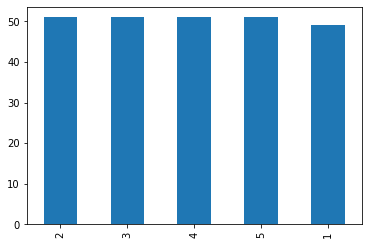

In [ ]:
dataset['VZ'].value_counts().plot.bar()

In [ ]:
dataset.corr()

,Sl,VZ,A,R,P,So,G
Sl,1.000000,0.979781,0.881780,-0.019039,-0.492986,0.504484,-0.154231
VZ,0.979781,1.000000,0.915616,-0.020350,-0.527031,0.506634,-0.157473
A,0.881780,0.915616,1.000000,-0.013779,-0.417324,0.392726,-0.251446
R,-0.019039,-0.020350,-0.013779,1.000000,-0.097752,0.106630,-0.013239
P,-0.492986,-0.527031,-0.417324,-0.097752,1.000000,-0.483950,-0.130127
So,0.504484,0.506634,0.392726,0.106630,-0.483950,1.000000,0.145581
G,-0.154231,-0.157473,-0.251446,-0.013239,-0.130127,0.145581,1.000000


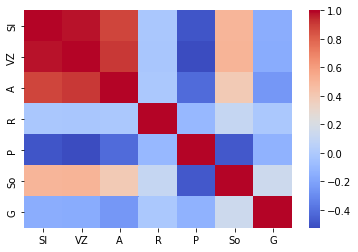

In [ ]:
sns.heatmap(dataset.corr(),cmap='coolwarm')

**Feature Selection**

**1. Forward Selection**

In [ ]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
sfs.fit(X, Y)

NameError: ignored

In [ ]:
sfs.k_feature_names_

In [ ]:
dataset.info()

**Backward Elimination**

In [ ]:
sbs = SFS(LinearRegression(),
         k_features=5,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X, Y)
sbs.k_feature_names_

**3. Hit and Trial**

In [ ]:
sfs1 = SFS(LinearRegression(),
         k_features=(3,5),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X, Y)

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

**4. Information Gain**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
dataset.info()

In [ ]:
col_names = ['Sl', 'VZ', 'A', 'R', 'P', 'So', 'G']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Wetland/t3_featurecols.csv', header=None, names=col_names)

In [ ]:
feature_cols = ['Sl', 'A', 'R', 'P', 'So', 'G']
A = dataset[feature_cols] # Features
B = dataset.VZ # Target variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
B = le.fit_transform(B)

In [ ]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.3, random_state=1)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(A_train,B_train)

#Predict the response for test dataset
B_pred = clf.predict(A_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

In [ ]:
pip install six

In [ ]:
!pip install --upgrade scikit-learn==0.20.3

In [ ]:
from six import StringIO

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3','4','5'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wetland.png')
Image(graph.create_png())

**Sequential Feature Selection**

In [ ]:
!pip install delayed

In [ ]:
from collections.abc import Iterable

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(svc, direction='forward')
sfs.fit(X, Y)
sfs.fit_transform(X,Y)

**Dataset Preprocessing**

**Split Dataset**

In [ ]:
#X = dataset.iloc[:,2:]
#Y = dataset.VZ

In [ ]:
feature_cols = ['Sl No', 'A', 'R', 'P', 'So', 'G']
X = dataset[feature_cols] # Features
Y = dataset.VZ # Target variable

NameError: ignored

In [ ]:
print(X)

In [ ]:
print(Y)

**Label Encode**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(Y)
Y= label_encoder.transform(Y)
classes = label_encoder.classes_

In [ ]:
print(Y)

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

**Min Max Scaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)
X_test_norm = min_max_scaler.fit_transform(X_test)

In [ ]:
X_train_norm[0,0]

In [ ]:
X_train.iloc[0,0]

**TP,FP,TN,FN**

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

**1. Classifier - Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(max_depth=6, random_state=1)
# Predict test set labels
dt.fit(X_train, y_train)
DT_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, DT_pred)
print("Test set accuracy: {:.2f}".format(acc))

In [ ]:
print(classification_report(y_test, DT_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = DT_pred
label=['1', '2','3','4','5']
Ytrue = y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Decision Tree")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_DT = confusion_matrix(y_test, DT_pred, labels=[1,2,3,4,5])
cmt_DT = confusion_matrix(y_test, DT_pred)

In [ ]:
print(cmt_DT)

In [ ]:
fp = cmt_DT.sum(axis=0) - np.diag(cm)  
fn = cmt_DT.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_DT)
tn = cmt_DT.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = OneVsRestClassifier(DecisionTreeClassifier(max_depth=6, random_state=1))
DT.fit(X_train_norm, y_train)
y_pred = DT.predict(X_test_norm)
pred_prob = DT.predict_proba(X_test_norm)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = OneVsRestClassifier(DecisionTreeClassifier(max_depth=6, random_state=1))
DT.fit(X_train_norm, y_train)
y_pred = DT.predict(X_test_norm)
pred_prob = DT.predict_proba(X_test_norm)

In [ ]:
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes = np.unique(y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc= 'lower right')
plt.show()0

**2. Classifier : Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)

In [ ]:
NB_pred = clf_NB.predict(X_test)

In [ ]:
print(NB_pred)

In [ ]:
NB_acc = accuracy_score(y_test, NB_pred)
print(NB_acc)

In [ ]:
print(classification_report(y_test, NB_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = NB_pred
label=['1', '2','3','4','5']
Ytrue = y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Naive Bayes")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_NB = confusion_matrix(y_test, NB_pred, labels=[1,2,3,4,5])
cmt_NB = confusion_matrix(y_test, NB_pred)

In [ ]:
print(cmt_NB)

In [ ]:
fp = cmt_NB.sum(axis=0) - np.diag(cm)  
fn = cmt_NB.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_NB)
tn = cmt_NB.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = OneVsRestClassifier(GaussianNB())
NB.fit(X_train_norm, y_train)
y_pred = NB.predict(X_test_norm)
pred_prob = NB.predict_proba(X_test_norm)

In [ ]:
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes = np.unique(y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve - Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc= 'lower right')
plt.show()

**3. Classifier : KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

In [ ]:
KNN_pred = classifier.predict(X_test)

In [ ]:
KNN_acc = accuracy_score(y_test, KNN_pred)
print(KNN_acc)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, KNN_pred))

In [ ]:
print(classification_report(y_test, KNN_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = KNN_pred
label=['1', '2','3','4','5']
Ytrue = y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for KNN")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_KNN = confusion_matrix(y_test, KNN_pred, labels=[1,2,3,4,5])
cmt_KNN = confusion_matrix(y_test, KNN_pred)

In [ ]:
print(cmt_KNN)

In [ ]:
fp = cmt_KNN.sum(axis=0) - np.diag(cm)  
fn = cmt_KNN.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_KNN)
tn = cmt_KNN.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
KNN.fit(X_train_norm, y_train)
y_pred = KNN.predict(X_test_norm)
pred_prob = KNN.predict_proba(X_test_norm)

In [ ]:
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes = np.unique(y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc= 'lower right')
plt.show()

**4. Classifier : Artificial Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
nnc = MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000)
nnc.fit(X_train, y_train)
nnc_pred =nnc.predict(X_test)
nnc_acc=accuracy_score(y_test, nnc_pred)
print(nnc_acc)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, nnc_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = nnc_pred
label=['1', '2','3','4','5']
Ytrue = y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for ANN")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_ANN = confusion_matrix(y_test, nnc_pred, labels=[1,2,3,4,5])
cmt_ANN = confusion_matrix(y_test, nnc_pred)

In [ ]:
print(cmt_ANN)

In [ ]:
fp = cmt_ANN.sum(axis=0) - np.diag(cm)  
fn = cmt_ANN.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_ANN)
tn = cmt_ANN.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

In [ ]:
from sklearn.neural_network import MLPClassifier
ANN = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000))
ANN.fit(X_train_norm, y_train)
y_pred = ANN.predict(X_test_norm)
pred_prob = ANN.predict_proba(X_test_norm)

In [ ]:
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes = np.unique(y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : Artificial Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc= 'lower right')
plt.show()

**5. Classifier : Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
randomf = RandomForestClassifier(n_estimators=100)
randomf.fit(X_train, y_train)
rf_pred = randomf.predict(X_test)
rf_acc=accuracy_score(y_test, rf_pred)
print(rf_acc)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = nnc_pred
label=['1', '2','3','4','5']
Ytrue = y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for ANN")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_RF = confusion_matrix(y_test, rf_pred, labels=[1,2,3,4,5])
cmt_RF = confusion_matrix(y_test, rf_pred)

In [ ]:
print(cmt_RF)

In [ ]:
fp = cmt_RF.sum(axis=0) - np.diag(cm)  
fn = cmt_RF.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_RF)
tn = cmt_RF.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
RF = OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_norm, y_train)
y_pred = RF.predict(X_test_norm)
pred_prob = RF.predict_proba(X_test_norm)

In [ ]:
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes = np.unique(y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc= 'lower right')
plt.show()

**5. Classifier : Gradiant Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import joblib
from  sklearn.utils import parallel_backend 
gboost = GradientBoostingClassifier(learning_rate=.1, n_estimators=500,max_depth=5 )

In [ ]:
gboost.fit(X_train, y_train)
gboost_pred = gboost.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
gboost_acc=accuracy_score(y_test, gboost_pred)
print(gboost_acc)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gboost_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = gboost_pred
label=['1', '2','3','4','5']
Ytrue = y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Gradient Boost")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_gboost = confusion_matrix(y_test, gboost_pred, labels=[1,2,3,4,5])
cmt_gboost = confusion_matrix(y_test, gboost_pred)

In [ ]:
print(cmt_gboost)

In [ ]:
fp = cmt_gboost.sum(axis=0) - np.diag(cm)  
fn = cmt_gboost.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_gboost)
tn = cmt_gboost.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
gboost = OneVsRestClassifier(GradientBoostingClassifier(learning_rate=.1, n_estimators=500,max_depth=5 ))
gboost.fit(X_train_norm, y_train)
y_pred = gboost.predict(X_test_norm)
pred_prob = gboost.predict_proba(X_test_norm)

In [ ]:
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes = np.unique(y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : Gradiant Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc= 'lower right')
plt.show()

**6. Classifier : Xtreme Gradient Boost**

In [ ]:
import xgboost as xgb
xgbd = xgb.XGBClassifier(max_depth=10, n_estimators=5000 , learning_rate=.5, n_jobs=-1)

In [ ]:
xgbd.fit(X_train, y_train)
xgb_pred = xgbd.predict(X_test)
xgb_acc=accuracy_score(y_test, xgb_pred)
print(xgb_acc)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = xgb_pred
label=['1', '2','3','4','5']
Ytrue = y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Xtreme Gradient Boost")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_xgb = confusion_matrix(y_test, xgb_pred, labels=[1,2,3,4,5])
cmt_xgb = confusion_matrix(y_test, xgb_pred)

In [ ]:
print(cmt_xgb)

In [ ]:
fp = cmt_xgb.sum(axis=0) - np.diag(cm)  
fn = cmt_xgb.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_xgb)
tn = cmt_xgb.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

In [ ]:
import xgboost as xgb
xgboost = OneVsRestClassifier(xgb.XGBClassifier(max_depth=10, n_estimators=5000 , learning_rate=.5, n_jobs=-1))
xgboost.fit(X_train_norm, y_train)
y_pred = xgboost.predict(X_test_norm)
pred_prob = xgboost.predict_proba(X_test_norm)

In [ ]:
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes = np.unique(y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : Xtreme Gradient Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc= 'lower right')
plt.show()

**7. Classifer: Stacking Random Forest**

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
randomf = RandomForestClassifier(n_jobs=-1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
from sklearn.model_selection import GridSearchCV
estimators = [('rf', randomf),('neural', nnc),
        ('knn',knn)
        ]
from sklearn.ensemble import StackingClassifier
final_estimator = {'final_estimator':[randomf,knn,nnc,None]}
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
newgsearchrandom =  StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=randomf)
newgsearchrandom.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
newgsearchrandom_pred = newgsearchrandom.predict(X_test)
newgsearchrandom_acc=accuracy_score(y_test, newgsearchrandom_pred)
print(newgsearchrandom_acc)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, newgsearchrandom_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = newgsearchrandom_pred
label=['1', '2','3','4','5']
Ytrue = y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Stacking Random Forest")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_SRF = confusion_matrix(y_test, newgsearchrandom_pred, labels=[1,2,3,4,5])
cmt_SRF = confusion_matrix(y_test, newgsearchrandom_pred)

In [ ]:
print(cmt_SRF)

In [ ]:
fp = cmt_SRF.sum(axis=0) - np.diag(cm)  
fn = cmt_SRF.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_SRF)
tn = cmt_SRF.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

In [ ]:
Stacking_RF = OneVsRestClassifier(StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=randomf))
Stacking_RF.fit(X_train_norm, y_train)
y_pred = Stacking_RF.predict(X_test_norm)
pred_prob = Stacking_RF.predict_proba(X_test_norm)

In [ ]:
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes = np.unique(y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : STacking Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc= 'lower right')
plt.show()

**8. Classifier: Stacking Neural Network**

In [ ]:
newgsearchnnc =  StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=nnc)
newgsearchnnc.fit(X_train, y_train)
newgsearchnnc_pred = newgsearchnnc.predict(X_test)
newgsearchnnc_acc=accuracy_score(y_test, newgsearchnnc_pred)
print(newgsearchnnc_acc)

In [ ]:
print(classification_report(y_test, newgsearchnnc_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = newgsearchnnc_pred
label=['1', '2','3','4', '5']
Ytrue = y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Neural Network as Final Estimator")
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_SANN = confusion_matrix(y_test, newgsearchnnc_pred, labels=[1,2,3,4,5])
cmt_SANN = confusion_matrix(y_test, newgsearchnnc_pred)

In [ ]:
print(cmt_SANN)

In [ ]:
fp = cmt_SANN.sum(axis=0) - np.diag(cm)  
fn = cmt_SANN.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_SANN)
tn = cmt_SANN.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

In [ ]:
Stacking_ANN =   OneVsRestClassifier(StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=nnc))
Stacking_ANN.fit(X_train_norm, y_train)
y_pred = Stacking_ANN.predict(X_test_norm)
pred_prob = Stacking_ANN.predict_proba(X_test_norm)

In [ ]:
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes = np.unique(y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : Stacking Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc= 'lower right')
plt.show()

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svc = LinearSVC(C=10, class_weight='balanced')
svc.fit(X_train, y_train)

In [ ]:
SVM_pred = svc.predict(X_test)

In [ ]:
SVM_pred = svc.predict(X_test)

In [ ]:
print(y_test)

In [ ]:
SVM_acc = accuracy_score(y_test, SVM_pred)
print(SVM_acc)

In [ ]:
print(classification_report(y_test, SVM_pred))

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_new = SVC(kernel ='rbf', class_weight='balanced')
svc_new.fit(X_train, y_train)

In [ ]:
SVM_newpred = svc_new.predict(X_test)

In [ ]:
SVMnew_acc = accuracy_score(y_test, SVM_newpred)
print(SVMnew_acc)

In [ ]:
print(classification_report(y_test, SVM_newpred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = SVM_newpred
label=['1', '2','3','4', '5']
Ytrue = y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Support Vector Machine")
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_SVM = confusion_matrix(y_test, SVM_newpred, labels=[1,2,3,4,5])
cmt_SVM = confusion_matrix(y_test, SVM_newpred)

In [ ]:
print(cmt_SVM)

In [ ]:
fp = cmt_SVM.sum(axis=0) - np.diag(cm)  
fn = cmt_SVM.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_SVM)
tn = cmt_SVM.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

In [ ]:
idx = 0
print( "TP rate for Class 1:",tp[idx])
print( "TN rate for Class 1:",tn[idx])
print( "FP rate for Class 1:",fp[idx])
print( "FN rate for Class 1:",fn[idx])

In [ ]:
idx = 1
print( "TP rate for Class 2:",tp[idx])
print( "TN rate for Class 2:",tn[idx])
print( "FP rate for Class 2:",fp[idx])
print( "FN rate for Class 2:",fn[idx])

In [ ]:
idx = 2
print( "TP rate for Class 3:",tp[idx])
print( "TN rate for Class 3:",tn[idx])
print( "FP rate for Class 3:",fp[idx])
print( "FN rate for Class 3:",fn[idx])

In [ ]:
idx = 3
print( "TP rate for Class 4:",tp[idx])
print( "TN rate for Class 4:",tn[idx])
print( "FP rate for Class 4:",fp[idx])
print( "FN rate for Class 4:",fn[idx])

In [ ]:
idx = 4
print( "TP rate for Class 5:",tp[idx])
print( "TN rate for Class 5:",tn[idx])
print( "FP rate for Class 5:",fp[idx])
print( "FN rate for Class 5:",fn[idx])

In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

In [ ]:
SVM_new =   OneVsRestClassifier(SVC(kernel ='rbf',probability=True, class_weight='balanced'))
SVM_new.fit(X_train_norm, y_train)
y_pred = SVM_new.predict(X_test_norm)
pred_prob = SVM_new.predict_proba(X_test_norm)

In [ ]:
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes = np.unique(y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : Support Vector Machine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc= 'lower right')
plt.show()